#All imported libraries for the project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.utils.metaestimators import BaseEstimator
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score

#Data Cleaning

In [ ]:
path = "/content/drive/MyDrive/Data_Science_Project/vodafone_age_subset.csv"
df = pd.read_csv(path, sep=',')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Columns: 116 entries, CALCULATION_METHOD_ID to target
dtypes: float64(97), int64(5), object(14)
memory usage: 18.6+ MB


In [ ]:
df.iloc[:,:61].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CALCULATION_METHOD_ID        21000 non-null  int64  
 1   calls_count_in_weekdays      21000 non-null  float64
 2   calls_duration_in_weekdays   21000 non-null  float64
 3   calls_count_out_weekdays     21000 non-null  float64
 4   calls_duration_out_weekdays  21000 non-null  float64
 5   calls_count_in_weekends      21000 non-null  float64
 6   calls_duration_in_weekends   21000 non-null  float64
 7   calls_count_out_weekends     21000 non-null  float64
 8   calls_duration_out_weekends  21000 non-null  float64
 9   DATA_VOLUME_WEEKDAYS         21000 non-null  float64
 10  DATA_VOLUME_WEEKENDS         21000 non-null  float64
 11  LAT_HOME                     21000 non-null  float64
 12  LON_HOME                     21000 non-null  float64
 13  Oblast_post_HOME

In [ ]:
df.iloc[:,61:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TNK                 21000 non-null  float64
 1   UPG                 21000 non-null  float64
 2   gas_stations_sms    21000 non-null  float64
 3   fb_volume           21000 non-null  float64
 4   fb_count            21000 non-null  float64
 5   instagram_volume    21000 non-null  float64
 6   intagram_count      21000 non-null  float64
 7   viber_volume        21000 non-null  float64
 8   viber_count         21000 non-null  float64
 9   youtube_volume      21000 non-null  float64
 10  youtube_count       21000 non-null  float64
 11  google_volume       21000 non-null  float64
 12  google_count        21000 non-null  float64
 13  gmail_volume        21000 non-null  float64
 14  gmail_count         21000 non-null  float64
 15  skype_volume        21000 non-null  float64
 16  skyp

In [ ]:
zero_percentages = (df.iloc[:, :60] == 0).mean() * 100
print(zero_percentages)

CALCULATION_METHOD_ID            0.000000
calls_count_in_weekdays          6.900000
calls_duration_in_weekdays       6.900000
calls_count_out_weekdays         8.052381
calls_duration_out_weekdays      8.052381
calls_count_in_weekends         11.585714
calls_duration_in_weekends      11.585714
calls_count_out_weekends        14.104762
calls_duration_out_weekends     14.104762
DATA_VOLUME_WEEKDAYS            40.723810
DATA_VOLUME_WEEKENDS            44.828571
LAT_HOME                         6.166667
LON_HOME                         6.166667
Oblast_post_HOME                 0.000000
Raion_post_HOME                  0.000000
City_post_HOME                   0.000000
lat_quad_home                    6.166667
lon_quad_home                    6.166667
LAT_WORK                         4.580952
LON_WORK                         4.580952
Oblast_post_WORK                 0.000000
Raion_post_WORK                  0.000000
City_post_WORK                   0.000000
lat_quad_work                    4

In [ ]:
zero_percentages = (df.iloc[:, 60:] == 0).mean() * 100
print(zero_percentages)

AMIC                  99.171429
TNK                   99.561905
UPG                   99.152381
gas_stations_sms      83.500000
fb_volume             44.395238
fb_count              44.376190
instagram_volume      62.542857
intagram_count        62.533333
viber_volume          46.223810
viber_count           46.133333
youtube_volume        46.628571
youtube_count         46.619048
google_volume         42.880952
google_count          42.871429
gmail_volume          59.176190
gmail_count           59.176190
skype_volume          77.190476
skype_count           77.190476
twitter_volume        64.833333
twitter_count         64.809524
dropbox_volume        95.638095
dropbox_count         95.638095
uber_volume           95.485714
uber_count            95.485714
steam_volume          98.757143
steam_count           98.752381
whatsapp_volume       79.576190
whatsapp_count        79.528571
itunes_volume         81.780952
itunes_count          81.780952
snapchat_volume       95.309524
snapchat

In [ ]:
columns_to_keep = ["device_type_rus", "ROUM", "phone_value", "SCORING", "car", "gender","ecommerce_score"]
df = df.drop(df[df['SCORING'] == '0'].index)
zero_percentages = (df == 0).mean() * 100
selected_columns = zero_percentages[(zero_percentages <= 45) | (zero_percentages.index.isin(columns_to_keep))]
df = df[selected_columns.index]
if "user_hash" in df.columns:
    df.drop(columns=["user_hash"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20996 entries, 0 to 20999
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CALCULATION_METHOD_ID        20996 non-null  int64  
 1   calls_count_in_weekdays      20996 non-null  float64
 2   calls_duration_in_weekdays   20996 non-null  float64
 3   calls_count_out_weekdays     20996 non-null  float64
 4   calls_duration_out_weekdays  20996 non-null  float64
 5   calls_count_in_weekends      20996 non-null  float64
 6   calls_duration_in_weekends   20996 non-null  float64
 7   calls_count_out_weekends     20996 non-null  float64
 8   calls_duration_out_weekends  20996 non-null  float64
 9   DATA_VOLUME_WEEKDAYS         20996 non-null  float64
 10  DATA_VOLUME_WEEKENDS         20996 non-null  float64
 11  LAT_HOME                     20996 non-null  float64
 12  LON_HOME                     20996 non-null  float64
 13  Oblast_post_HOME

#Visualization

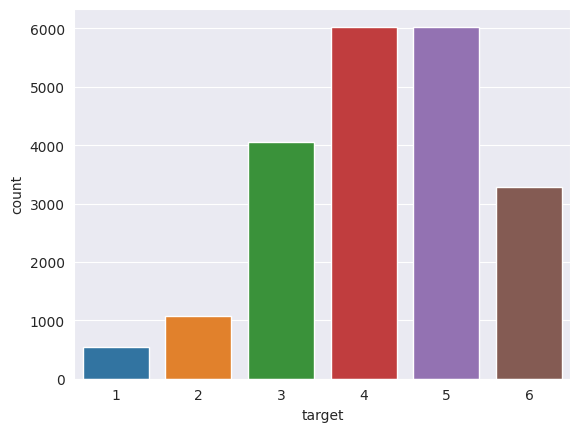

In [ ]:
sns.set_style("darkgrid")
sns.countplot(data = df,x = "target")
plt.show()

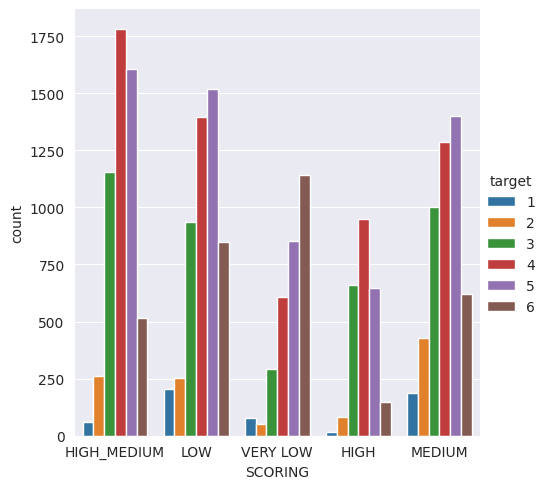

In [ ]:
sns.set_style("darkgrid")
sns.catplot(data = df,hue = 'target',x = "SCORING",kind = "count")
plt.show()

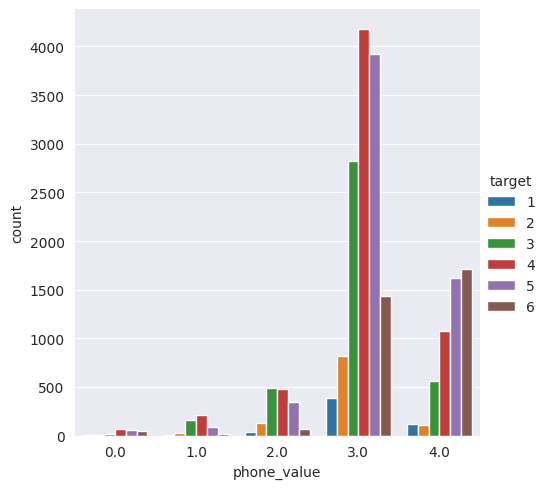

In [ ]:
sns.set_style("darkgrid")
sns.catplot(data = df,hue = 'target',x = "phone_value",kind = "count")
plt.show()

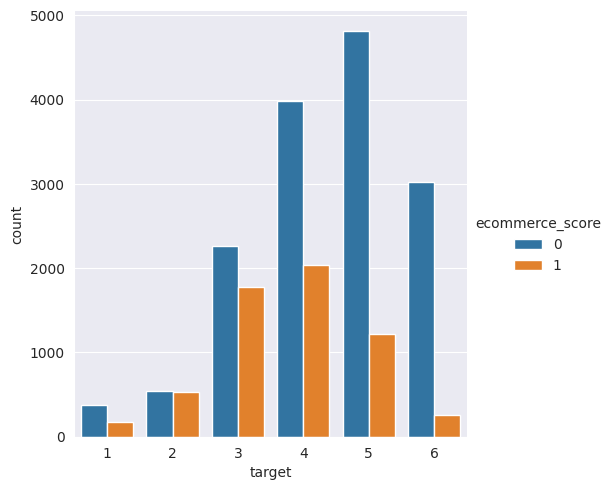

In [ ]:
sns.set_style("darkgrid")
sns.catplot(data = df,hue = 'ecommerce_score',x = 'target',kind = "count")
plt.show()

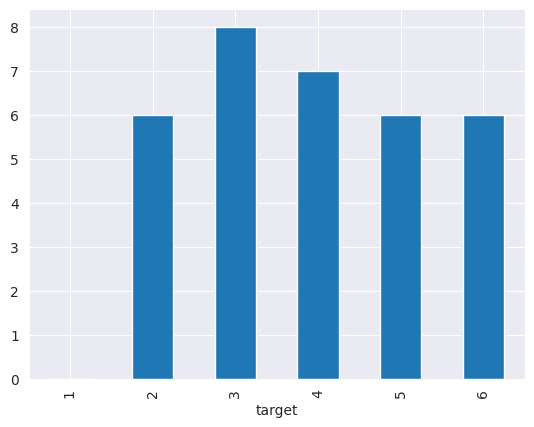

In [ ]:
sns.set_style("darkgrid")
df.groupby('target')['banks_sms_count'].agg('median').plot(kind='bar')
plt.show()

# Data Preprocessing

In [ ]:
df['device_type_rus'] = df['device_type_rus'].replace('0', 'laptop')
df['device_type_rus'] = df['device_type_rus'].map({'smartphone': 0, 'phone': 1, 'laptop': 2})
df['SCORING'] = df['SCORING'].map({'VERY LOW': 1, 'LOW': 2, 'MEDIUM': 3, 'HIGH_MEDIUM': 4, 'HIGH': 5,})

In [ ]:
unique_values = df['Oblast_post_HOME'].unique()
numeric_values = pd.factorize(df['Oblast_post_HOME'])[0] + 1
df['Oblast_post_HOME'] = numeric_values

unique_values = df['Raion_post_HOME'].unique()
numeric_values = pd.factorize(df['Raion_post_HOME'])[0] + 1
df['Raion_post_HOME'] = numeric_values

unique_values = df['City_post_HOME'].unique()
numeric_values = pd.factorize(df['City_post_HOME'])[0] + 1
df['City_post_HOME'] = numeric_values

unique_values = df['Oblast_post_WORK'].unique()
numeric_values = pd.factorize(df['Oblast_post_WORK'])[0] + 1
df['Oblast_post_WORK'] = numeric_values

unique_values = df['Raion_post_WORK'].unique()
numeric_values = pd.factorize(df['Raion_post_WORK'])[0] + 1
df['Raion_post_WORK'] = numeric_values

unique_values = df['City_post_WORK'].unique()
numeric_values = pd.factorize(df['City_post_WORK'])[0] + 1
df['City_post_WORK'] = numeric_values

unique_values = df['device_brand'].unique()
numeric_values = pd.factorize(df['device_brand'])[0] + 1
df['device_brand'] = numeric_values

unique_values = df['device_model'].unique()
numeric_values = pd.factorize(df['device_model'])[0] + 1
df['device_model'] = numeric_values

unique_values = df['software_os_vendor'].unique()
numeric_values = pd.factorize(df['software_os_vendor'])[0] + 1
df['software_os_vendor'] = numeric_values

unique_values = df['software_os_name'].unique()
numeric_values = pd.factorize(df['software_os_name'])[0] + 1
df['software_os_name'] = numeric_values

unique_values = df['software_os_version'].unique()
numeric_values = pd.factorize(df['software_os_version'])[0] + 1
df['software_os_version'] = numeric_values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20996 entries, 0 to 20999
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CALCULATION_METHOD_ID        20996 non-null  int64  
 1   calls_count_in_weekdays      20996 non-null  float64
 2   calls_duration_in_weekdays   20996 non-null  float64
 3   calls_count_out_weekdays     20996 non-null  float64
 4   calls_duration_out_weekdays  20996 non-null  float64
 5   calls_count_in_weekends      20996 non-null  float64
 6   calls_duration_in_weekends   20996 non-null  float64
 7   calls_count_out_weekends     20996 non-null  float64
 8   calls_duration_out_weekends  20996 non-null  float64
 9   DATA_VOLUME_WEEKDAYS         20996 non-null  float64
 10  DATA_VOLUME_WEEKENDS         20996 non-null  float64
 11  LAT_HOME                     20996 non-null  float64
 12  LON_HOME                     20996 non-null  float64
 13  Oblast_post_HOME

#Standardization of data and division of the data set into training and test parts

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Training

##Using the Random Forest mode

In [ ]:
forest = RandomForestClassifier(random_state=2023)
forest.fit(X_train_scaled, y_train)

y_pred = forest.predict(X_test_scaled)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.31      0.03      0.06       132
           2       0.38      0.13      0.19       280
           3       0.41      0.38      0.39      1042
           4       0.39      0.45      0.42      1492
           5       0.40      0.50      0.45      1498
           6       0.53      0.40      0.45       805

    accuracy                           0.41      5249
   macro avg       0.40      0.31      0.33      5249
weighted avg       0.42      0.41      0.41      5249



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': np.arange(5, 12, 1),
    'max_features': ['sqrt', 'log2', 0.5, 0.3, 0.1],
    'criterion': ['gini', 'entropy']
}

kfold = KFold(n_splits=5, shuffle=True, random_state=2023)

forest = RandomForestClassifier()

rf_cv = RandomizedSearchCV(forest, param_grid, scoring='accuracy', verbose=1, cv=kfold, n_jobs=-1)
rf_cv.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
                                        'max_features': ['sqrt', 'log2', 0.5,
                                                         0.3, 0.1],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [ ]:
print(rf_cv.best_params_)

{'n_estimators': 200, 'max_features': 0.5, 'max_depth': 11, 'criterion': 'entropy'}


In [ ]:
best_rf = rf_cv.best_estimator_
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.43      0.10      0.16       132
           2       0.44      0.17      0.25       280
           3       0.38      0.39      0.38      1042
           4       0.41      0.44      0.42      1492
           5       0.42      0.50      0.46      1498
           6       0.52      0.42      0.46       805

    accuracy                           0.42      5249
   macro avg       0.43      0.34      0.36      5249
weighted avg       0.43      0.42      0.42      5249



##Using the Tree mode

In [ ]:
tree = DecisionTreeClassifier(random_state=2023)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

feature_importance = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

              precision    recall  f1-score   support

           1       0.18      0.18      0.18       132
           2       0.24      0.22      0.23       280
           3       0.29      0.28      0.28      1042
           4       0.33      0.34      0.34      1492
           5       0.35      0.35      0.35      1498
           6       0.35      0.35      0.35       805

    accuracy                           0.32      5249
   macro avg       0.29      0.29      0.29      5249
weighted avg       0.32      0.32      0.32      5249



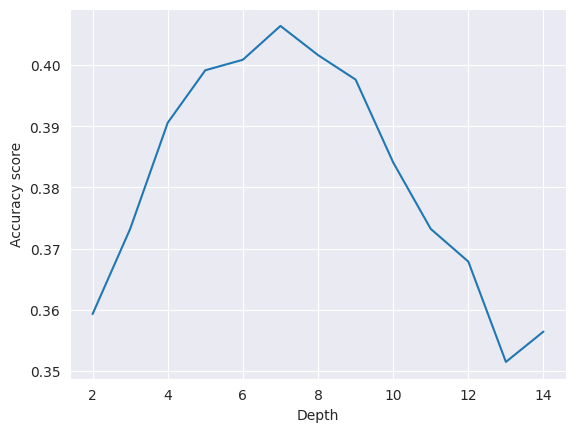

In [ ]:
accur_scr = []
for depth in range(2, 15):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=2023)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accur_scr.append(accuracy_score(y_test, y_pred))

plt.plot(range(2, 15), accur_scr)
plt.xlabel('Depth')
plt.ylabel('Accuracy score')
plt.show()

In [ ]:
tree = DecisionTreeClassifier(max_depth = 7,random_state=2023)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

feature_importance = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
top_7_features = feature_importance[:7]
print(top_7_features)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       132
           2       0.42      0.09      0.15       280
           3       0.38      0.46      0.42      1042
           4       0.39      0.35      0.37      1492
           5       0.41      0.56      0.47      1498
           6       0.49      0.33      0.40       805

    accuracy                           0.41      5249
   macro avg       0.35      0.30      0.30      5249
weighted avg       0.40      0.41      0.39      5249

lifetime                 0.200343
CALCULATION_METHOD_ID    0.194076
fb_volume                0.140223
DATA_VOLUME_WEEKENDS     0.061488
AVG_ARPU                 0.044438
banks_sms_count          0.041683
device_type_rus          0.037709
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param_grid = {
    'max_depth': np.arange(5, 12, 1),
    'max_features': ['sqrt', 'log2', 0.5, 0.3, 0.1],
    'criterion': ['gini', 'entropy']
}

kfold = KFold(n_splits=5, shuffle=True, random_state=2023)

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, param_grid, scoring='accuracy', verbose=1, cv=kfold, n_jobs=-1)
tree_cv.fit(X_train, y_train)


Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
                         'max_features': ['sqrt', 'log2', 0.5, 0.3, 0.1]},
             scoring='accuracy', verbose=1)

In [ ]:
print(tree_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 0.5}


In [ ]:
best_tree = tree_cv.best_estimator_
y_pred = best_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       132
           2       0.32      0.15      0.21       280
           3       0.37      0.35      0.36      1042
           4       0.36      0.47      0.41      1492
           5       0.42      0.39      0.40      1498
           6       0.44      0.43      0.44       805

    accuracy                           0.39      5249
   macro avg       0.32      0.30      0.30      5249
weighted avg       0.38      0.39      0.38      5249



##Using the Logistic regression mode

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           1       0.30      0.05      0.09       132
           2       0.45      0.17      0.25       280
           3       0.35      0.35      0.35      1042
           4       0.39      0.40      0.39      1492
           5       0.40      0.52      0.46      1498
           6       0.48      0.38      0.42       805

    accuracy                           0.40      5249
   macro avg       0.40      0.31      0.33      5249
weighted avg       0.40      0.40      0.39      5249



In [ ]:
param_grid = {
    'penalty': ['l2', None],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'multi_class': ['multinomial']
}

kfold = KFold(n_splits=5, shuffle=True, random_state=2023)

log_reg = LogisticRegression()

log_reg_cv = GridSearchCV(log_reg, param_grid, scoring='accuracy', verbose=1, cv=kfold, n_jobs=-1)
log_reg_cv.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'multi_class': ['multinomial'],
                         'penalty': ['l2', None],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
print(log_reg_cv.best_params_)

{'multi_class': 'multinomial', 'penalty': None, 'solver': 'newton-cg'}


In [ ]:
best_log_reg = log_reg_cv .best_estimator_
y_pred = best_log_reg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.27      0.03      0.05       132
           2       0.47      0.16      0.24       280
           3       0.35      0.34      0.35      1042
           4       0.39      0.40      0.39      1492
           5       0.41      0.53      0.46      1498
           6       0.48      0.38      0.42       805

    accuracy                           0.40      5249
   macro avg       0.39      0.31      0.32      5249
weighted avg       0.40      0.40      0.39      5249

